# 빗길과 눈길에서 발생하는교통사고의 비교

팀원 : 2019312039 뭉흐치멕, 2021316019 양혜인, 2020316007 김유경

In [48]:
# 필요 라이브러리

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import geopandas as gpd

## 1. 전국 시군구별 교통사고 히트맵

In [49]:
# 한글 폰트 설정

matplotlib.rcParams['font.family'] = 'Malgun Gothic' # Windows
matplotlib.rcParams['font.size'] = 13 # 글자 크기
matplotlib.rcParams['axes.unicode_minus'] = False # 한글 폰트 사용 시, 마이너스(-) 글자가 깨지는 현상을 해결

# 한글 폰트 사용을 위해서 세팅
# from matplotlib import font_manager, rc
# font_path = "C:/Windows/Fonts/NGULIM.TTF"
# font = font_manager.FontProperties(fname=font_path).get_name()
# rc('font', family=font)

In [50]:
# '전국 교통사고 위치 데이터' 불러오기

all_accidents_df = pd.read_csv('death.csv', encoding='cp949')
all_accidents_df.head(5)

,발생년,발생년월일시,주야,요일,사망자수,사상자수,중상자수,경상자수,부상신고자수,발생지시도,...,사고유형,법규위반,도로형태_대분류,도로형태,당사자종별_1당_대분류,당사자종별_2당_대분류,발생위치X_UTMK,발생위치Y_UTMK,경도,위도
0,2012,2012010101,야간,일,1,1,0,0,0,서울,...,차도통행중,안전운전 의무 불이행,단일로,기타단일로,승용차,보행자,949860,1957179,126.931890,37.612680
1,2012,2012010101,야간,일,1,6,5,0,0,전북,...,정면충돌,중앙선 침범,단일로,기타단일로,승용차,승용차,946537,1737695,126.909523,35.633956
2,2012,2012010108,주간,일,1,1,0,0,0,충남,...,공작물충돌,안전운전 의무 불이행,단일로,기타단일로,승용차,없음,940016,1832833,126.830281,36.491268
3,2012,2012010110,주간,일,2,2,0,0,0,경남,...,측면충돌,과속,교차로,교차로내,승합차,승용차,1059321,1748774,128.155984,35.733503
4,2012,2012010103,야간,일,1,1,0,0,0,경북,...,도로이탈 추락,안전운전 의무 불이행,단일로,기타단일로,승용차,없음,1070222,1834630,128.284180,36.506769


In [51]:
# 필요없는 열 삭제
all_accidents_df = all_accidents_df.drop(['발생년월일시', '주야', '요일', '사고유형_대분류','사고유형_중분류',
              '사고유형','법규위반','도로형태_대분류','도로형태','당사자종별_1당_대분류',
              '당사자종별_2당_대분류','발생위치X_UTMK','발생위치Y_UTMK'], axis=1)

In [52]:
# '교통사고 건수' 컬럼 생성) 사망자수 + 사상자수 + 중상자수 + 경상자수 + 부상신고자수
all_accidents_df['교통사고 건수'] = all_accidents_df['사망자수'] + all_accidents_df['사상자수'] + all_accidents_df['중상자수'] + all_accidents_df['경상자수'] + all_accidents_df['부상신고자수']
all_accidents_df = all_accidents_df.drop(['사망자수','사상자수','중상자수','경상자수','부상신고자수'], axis=1)
all_accidents_df

,발생년,발생지시도,발생지시군구,경도,위도,교통사고 건수
0,2012,서울,은평구,126.931890,37.612680,2
1,2012,전북,정읍시,126.909523,35.633956,12
2,2012,충남,청양군,126.830281,36.491268,2
3,2012,경남,합천군,128.155984,35.733503,4
4,2012,경북,예천군,128.284180,36.506769,2
...,...,...,...,...,...,...
39939,2021,경기,평택시,127.057882,37.081528,2
39940,2021,경기,평택시,127.136562,36.998521,2
39941,2021,경기,평택시,126.926540,36.963284,2
39942,2021,강원,양구군,127.985386,38.097913,2


In [53]:
# 2017년부터 2019년까지의 데이터 추출
all_accidents_df = all_accidents_df[(all_accidents_df['발생년'] >= 2017) & (all_accidents_df['발생년'] <= 2019)]
all_accidents_df['발생년']

# '발생지시도'로 그룹화하여 '교통사고 건수' 합산
sido_df = all_accidents_df.groupby(['발생지시도', '발생지시군구'])[['교통사고 건수']].sum()
sido_df

교통사고 건수
발생지시도 발생지시군구         
강원    강릉시         156
      고성군          60
      동해시          40
      삼척시         114
      속초시          50
...               ...
충북    제천시         164
      증평군          30
      진천군         124
      청주시         606
      충주시         468

[229 rows x 1 columns]

import folium

state_geo = 'TL_SCCO_SIG_WGS84.json'

# 지도 초기화
m = folium.Map(location=[37, 128], tiles="OpenStreetMap", zoom_start=8)

m.choropleth(
    geo_data=state_geo,
    name='choropleth',
    data=sido_df,
    columns=[sido_df.index.get_level_values(1), '교통사고 건수'],
    key_on='feature.properties.SIG_KOR_NM',
    fill_color='YlGn',
    fill_opacity=0.7,
    line_opacity=0.5,
    legend_name='교통사고 건(%)',
    highlight=True 
)
# 지도를 HTML 파일로 저장
m.save('시군구별_교통사고_지도데이터.html')
m

## 2. 서울_연도별 교통사고 사고건수

In [54]:
# 서울 교통사고 데이터(CSV파일) 불러오기

accident_df = pd.read_csv("accident_data.csv",encoding = 'EUC-KR')
accident_df.head(5)

,발생일,발생시간,발생지_시도,발생지_시군구,법정동명,사고건수,사망자수,중상자수,경상자수,부상신고자수
0,2017-01-01,0,서울,강북구,미아동,1,0,1,6,0
1,2017-01-01,0,서울,노원구,상계동,1,0,0,1,0
2,2017-01-01,0,서울,동작구,상도동,1,0,0,1,0
3,2017-01-01,0,서울,서초구,서초동,1,0,0,1,0
4,2017-01-01,0,서울,송파구,잠실동,1,0,0,1,0


In [55]:
#쓰지않는 데이터 열 삭제

del accident_df['발생시간']
del accident_df['발생지_시군구']
del accident_df['발생지_시도']
del accident_df['법정동명']

In [56]:
# '발생일'컬럼을 날짜 데이터로 변환
accident_df['발생일'] = pd.to_datetime(accident_df['발생일'])

#같은 날짜에 발생한 사건은 합치기
accident_df = accident_df.groupby('발생일').sum()

# 인덱스 이름 '날짜'로 변환
accident_df.index.name = '날짜'
accident_df

,사고건수,사망자수,중상자수,경상자수,부상신고자수
날짜,,,,,
2017-01-01,73,2,25,90,10
2017-01-02,82,4,27,92,17
2017-01-03,88,1,25,80,13
2017-01-04,115,1,39,99,25
2017-01-05,103,1,34,111,8
...,...,...,...,...,...
2019-12-27,94,0,27,88,14
2019-12-28,94,0,27,105,10
2019-12-29,78,1,26,87,7


### 서울_강수일수 데이터

In [57]:
# 강수일수 데이터(CSV파일) 불러오기
rain_df = pd.read_csv("rain_data.csv",encoding = 'EUC-KR')

# 날짜' 날짜데이터 형식으로 변환
rain_df['날짜'] = pd.to_datetime(rain_df['날짜'])

# 지점 열 삭제
rain_df.drop('지점', axis=1, inplace=True)

# 강수량 열 이름을 비로 변경
rain_df.rename(columns={'강수량(mm)': '비'}, inplace=True)

rain_df.loc[rain_df['비'].notnull(), '비'] = '비'

rain_df.head(5)

,날짜,비
0,2017-01-01,NaN
1,2017-01-02,비
2,2017-01-03,NaN
3,2017-01-04,NaN
4,2017-01-05,NaN


### 서울_눈일수 데이터

In [58]:
# 눈일수 데이터(CSV파일) 불러오기
snow_df = pd.read_csv("snow_data.csv",encoding = 'EUC-KR')

# 연도와 날짜 열을 합치고 날짜 형식으로 변환
snow_df['날짜'] = pd.to_datetime(snow_df['연도'].astype(str) + snow_df['날짜'].astype(str), format='%Y%m%d')

# 기상현상 열 이름을 눈으로 변경
snow_df.rename(columns={'기상현상': '눈'}, inplace=True)

# 열의 순서 변경, 연도, 지점, 일 최심신적설(cm) 열 삭제
snow_df = snow_df[['날짜', '눈']]

# 데이터프레임의 '눈'열 값들을 '눈'으로 변경
snow_df['눈'] = '눈'
snow_df.head(5)

,날짜,눈
0,2017-11-02,눈
1,2017-11-03,눈
2,2017-11-08,눈
3,2017-01-20,눈
4,2017-12-01,눈


### 교통사고 데이터, 강수일수, 눈일수 데이터프레임 합치기

In [59]:
# 'accident_df' 데이터프레임과 'rain_df' 데이터프레임을 날짜를 기준으로 병합
merged_df = pd.merge(accident_df, rain_df, on='날짜', how='left')

# 'merged_df'와 'snow_df'를 날짜를 기준으로 병합
merged_df = pd.merge(merged_df, snow_df, on='날짜', how='left')

merged_df

,날짜,사고건수,사망자수,중상자수,경상자수,부상신고자수,비,눈
0,2017-01-01,73,2,25,90,10,NaN,NaN
1,2017-01-02,82,4,27,92,17,비,NaN
2,2017-01-03,88,1,25,80,13,NaN,NaN
3,2017-01-04,115,1,39,99,25,NaN,NaN
4,2017-01-05,103,1,34,111,8,NaN,NaN
...,...,...,...,...,...,...,...,...
1091,2019-12-27,94,0,27,88,14,NaN,NaN
1092,2019-12-28,94,0,27,105,10,NaN,NaN
1093,2019-12-29,78,1,26,87,7,비,NaN
1094,2019-12-30,91,1,19,93,53,비,눈


In [60]:
merged_df['비'].fillna('', inplace=True)
merged_df['눈'].fillna('', inplace=True)
merged_df['날씨'] = merged_df['비'] + merged_df['눈']

merged_df['날씨'] = merged_df['날씨'].replace('', '맑음')
merged_df['날씨'] = merged_df['날씨'].replace('비눈', '눈')
merged_df

,날짜,사고건수,사망자수,중상자수,경상자수,부상신고자수,비,눈,날씨
0,2017-01-01,73,2,25,90,10,,,맑음
1,2017-01-02,82,4,27,92,17,비,,비
2,2017-01-03,88,1,25,80,13,,,맑음
3,2017-01-04,115,1,39,99,25,,,맑음
4,2017-01-05,103,1,34,111,8,,,맑음
...,...,...,...,...,...,...,...,...,...
1091,2019-12-27,94,0,27,88,14,,,맑음
1092,2019-12-28,94,0,27,105,10,,,맑음
1093,2019-12-29,78,1,26,87,7,비,,비
1094,2019-12-30,91,1,19,93,53,비,눈,눈


In [61]:
# 데이터 크기 확인
snow_count = merged_df[merged_df['날씨'] == '눈'].shape[0]
rain_count = merged_df[merged_df['날씨'] == '비'].shape[0]
clear_count = merged_df[merged_df['날씨'] == '맑음'].shape[0]

print("눈 개수:", snow_count)
print("비 개수:", rain_count)
print("맑음 개수:", clear_count)

눈 개수: 77
비 개수: 344
맑음 개수: 675


## 2_1. 서울_연도별 교통사고 사고건수 선 그래프

In [62]:
# '날짜' 열을 날짜 데이터 형식으로 변환
merged_df['날짜'] = pd.to_datetime(merged_df['날짜'], format='%Y-%m-%d')

# '날짜' 열에서 연도 추출 후,
# 연도로 그룹화하여 사고 건수 합산
df_year = merged_df.groupby(merged_df['날짜'].dt.year)['사고건수'].sum().reset_index()

# 연도별 교통사고 사고 건수
df_year

,날짜,사고건수
0,2017,38747
1,2018,38795
2,2019,39258


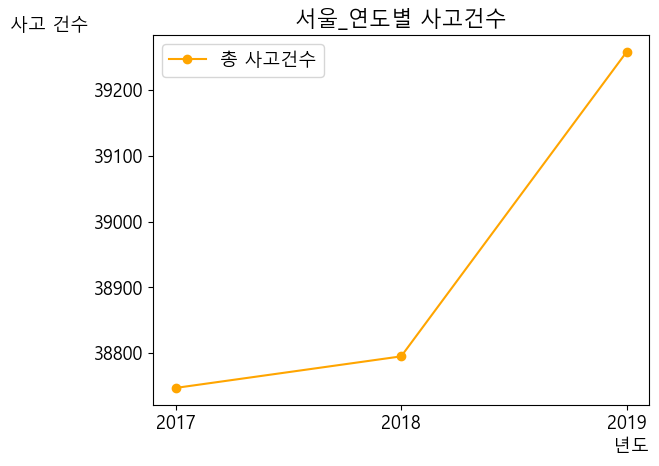

In [63]:
# 날짜와 사고 건수 데이터 추출
dates = df_year['날짜']
accident_counts = df_year['사고건수']

# 선 그래프 그리기
plt.plot(dates, accident_counts, label='총 사고건수', marker='o', color='orange')
plt.xlabel('연도')
plt.ylabel('사고건수')
plt.title('서울_연도별 사고건수') # 그래프 제목 설정
plt.xlabel('년도', loc='right', rotation=0) # x축 레이블 설정
plt.xticks([2017, 2018, 2019]) # x축 범위 설정
plt.ylabel('사고 건수', loc='top', rotation=0) # y축 레이블 설정

# 범례 표시
plt.legend()

# 이미지 저장
plt.savefig('서울_연도별 사고 건수', dpi=100)

plt.show()

In [64]:
def sum_3_by_weather(dataframe):
    grouped = dataframe.groupby('날씨')
    sums = grouped['경상자수'].sum()
    new_dataframe = pd.DataFrame({'날씨': sums.index, '경상자수_합계': sums.values})
    return new_dataframe

data = merged_df
df = pd.DataFrame(data)

result_df_3 = sum_3_by_weather(df)

def sum_2_by_weather(dataframe):
    grouped = dataframe.groupby('날씨')
    sums = grouped['중상자수'].sum()
    new_dataframe = pd.DataFrame({'날씨': sums.index, '중상자수_합계': sums.values})
    return new_dataframe

data = merged_df
df = pd.DataFrame(data)

result_df_2 = sum_2_by_weather(df)
del result_df_2['날씨']

def sum_1_by_weather(dataframe):
    grouped = dataframe.groupby('날씨')
    sums = grouped['사망자수'].sum()
    new_dataframe = pd.DataFrame({'날씨': sums.index, '사망자수_합계': sums.values})
    return new_dataframe

data = merged_df
df = pd.DataFrame(data)

result_df_1 = sum_1_by_weather(df)
del result_df_1['날씨']

def sum_0_by_weather(dataframe):
    grouped = dataframe.groupby('날씨')
    sums = grouped['부상신고자수'].sum()
    new_dataframe = pd.DataFrame({'날씨': sums.index, '부상자수_합계': sums.values})
    return new_dataframe

data = merged_df
df = pd.DataFrame(data)

result_df_0 = sum_0_by_weather(df)
del result_df_0['날씨']

In [65]:
final_result_df = pd.concat([result_df_3,result_df_2,result_df_1,result_df_0], axis=1)
final_result_df

,날씨,경상자수_합계,중상자수_합계,사망자수_합계,부상자수_합계
0,눈,8369,2476,65,1007
1,맑음,69270,21150,530,8878
2,비,35542,10371,303,4565


데이터 랜덤 추출 전

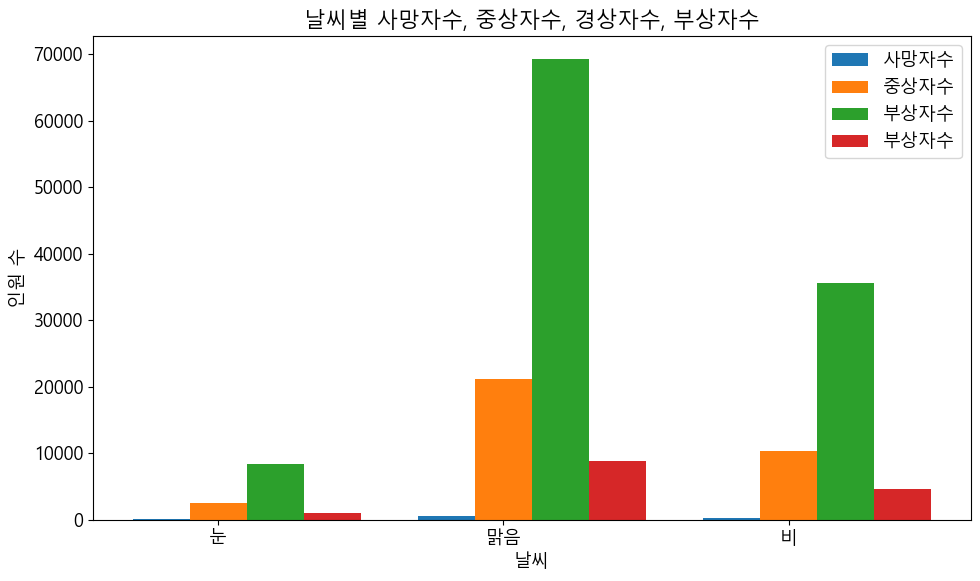

In [66]:
# 샘플 데이터프레임 생성
data = final_result_df
df = pd.DataFrame(data)

plt.figure(figsize=(10, 6))
bar_width = 0.2
index = np.arange(len(df['날씨']))

plt.bar(index, df['사망자수_합계'], bar_width, label='사망자수')
plt.bar(index + bar_width, df['중상자수_합계'], bar_width, label='중상자수')
plt.bar(index + 2 * bar_width, df['경상자수_합계'], bar_width, label='부상자수')
plt.bar(index + 3 * bar_width, df['부상자수_합계'], bar_width, label='부상자수')
plt.xlabel('날씨')
plt.ylabel('인원 수')
plt.title('날씨별 사망자수, 중상자수, 경상자수, 부상자수')
plt.xticks(index + bar_width, df['날씨'])
plt.legend()
plt.tight_layout()
plt.show()

데이터 랜덤 추출 후, 표본의 수를 맞추어 정확도를 높인다.

In [67]:
df = merged_df

# '비'가 써져 있는 데이터만 필터링하여 새로운 데이터프레임 생성
random_rain_df = df[df['날씨'] == '비'].sample(n=50)
random_snow_df = df[df['날씨'] == '눈'].sample(n=50)


random_df = pd.concat([random_rain_df, random_snow_df], ignore_index=True)
random_df

,날짜,사고건수,사망자수,중상자수,경상자수,부상신고자수,비,눈,날씨
0,2018-04-05,126,1,45,111,14,비,,비
1,2018-03-08,93,1,27,81,10,비,,비
2,2019-08-17,118,1,39,115,12,비,,비
3,2017-07-15,108,1,35,109,13,비,,비
4,2018-07-11,92,1,23,83,12,비,,비
...,...,...,...,...,...,...,...,...,...
95,2019-02-19,79,1,19,72,9,비,눈,눈
96,2017-12-31,72,0,22,95,7,비,눈,눈
97,2017-12-09,135,1,48,134,16,,눈,눈
98,2017-12-18,85,2,23,87,12,비,눈,눈


In [68]:
# 경상자수_합계_랜덤
def sum_3_by_weather_random(dataframe):
    grouped = dataframe.groupby('날씨')
    sums = grouped['경상자수'].sum()
    new_dataframe = pd.DataFrame({'날씨': sums.index, '경상자수_합계_랜덤': sums.values})
    return new_dataframe

data = random_df
df = pd.DataFrame(data)
result_df_3_random = sum_3_by_weather_random(df)
print(result_df_3_random)

  날씨  경상자수_합계_랜덤
0  눈        5386
1  비        5040


In [69]:
# 중상자수_합계_랜덤
def sum_2_by_weather_random(dataframe):
    grouped = dataframe.groupby('날씨')
    sums = grouped['중상자수'].sum()
    new_dataframe = pd.DataFrame({'날씨': sums.index, '중상자수_합계_랜덤': sums.values})
    return new_dataframe

data = merged_df
df = pd.DataFrame(data)

result_df_2_random = sum_2_by_weather_random(df)
del result_df_2_random['날씨']
print(result_df_2_random)

   중상자수_합계_랜덤
0        2476
1       21150
2       10371


In [70]:
# 사망자수_합계_랜덤
def sum_1_by_weather_random(dataframe):
    grouped = dataframe.groupby('날씨')
    sums = grouped['사망자수'].sum()
    new_dataframe = pd.DataFrame({'날씨': sums.index, '사망자수_합계_랜덤': sums.values})
    return new_dataframe

data = merged_df
df = pd.DataFrame(data)

result_df_1_random = sum_1_by_weather_random(df)
del result_df_1_random['날씨']
print(result_df_1_random)

   사망자수_합계_랜덤
0          65
1         530
2         303


In [71]:
# 부상신고자수_합계_랜덤
def sum_0_by_weather_random(dataframe):
    grouped = dataframe.groupby('날씨')
    sums = grouped['부상신고자수'].sum()
    new_dataframe = pd.DataFrame({'날씨': sums.index, '부상신고자수_합계_랜덤': sums.values})
    return new_dataframe

data = merged_df
df = pd.DataFrame(data)

result_df_0_random = sum_0_by_weather_random(df)
del result_df_0_random['날씨']
print(result_df_0_random)

   부상신고자수_합계_랜덤
0          1007
1          8878
2          4565


In [72]:
final_result_df_random = pd.concat([result_df_3_random,result_df_2_random,result_df_1_random,result_df_0_random], axis=1)
final_result_df_random['날씨'].fillna('맑음', inplace=True)
final_result_df_random.head()

,날씨,경상자수_합계_랜덤,중상자수_합계_랜덤,사망자수_합계_랜덤,부상신고자수_합계_랜덤
0,눈,5386.0,2476,65,1007
1,비,5040.0,21150,530,8878
2,맑음,NaN,10371,303,4565


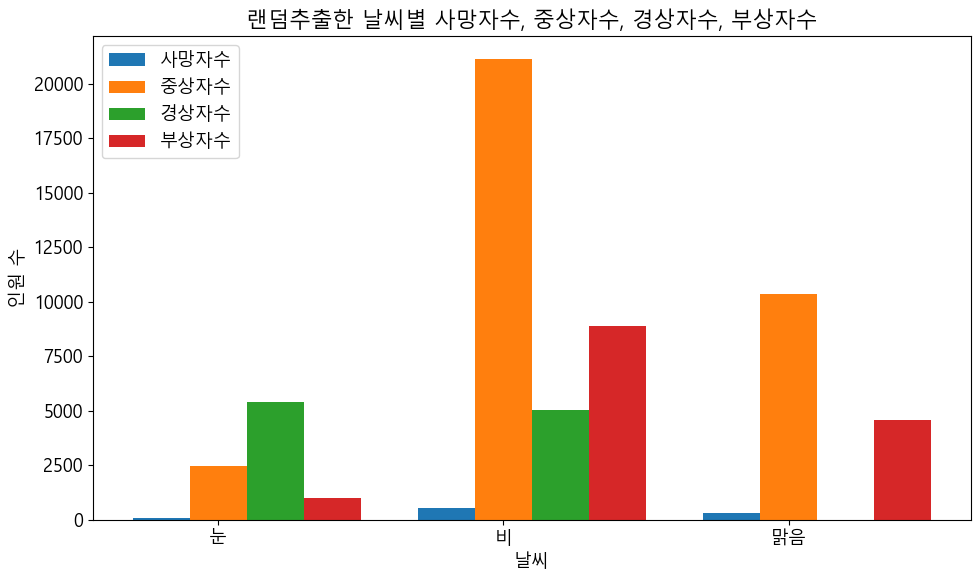

In [73]:
# 샘플 데이터프레임 생성
data = final_result_df_random
df = pd.DataFrame(data)

plt.figure(figsize=(10, 6))
bar_width = 0.2
index = np.arange(len(df['날씨']))

plt.bar(index, df['사망자수_합계_랜덤'], bar_width, label='사망자수')
plt.bar(index + bar_width, df['중상자수_합계_랜덤'], bar_width, label='중상자수')
plt.bar(index + 2 * bar_width, df['경상자수_합계_랜덤'], bar_width, label='경상자수')
plt.bar(index + 3 * bar_width, df['부상신고자수_합계_랜덤'], bar_width, label='부상자수')
plt.xlabel('날씨')
plt.ylabel('인원 수')
plt.title('랜덤추출한 날씨별 사망자수, 중상자수, 경상자수, 부상자수')
plt.xticks(index + bar_width, df['날씨'])
plt.legend()
plt.tight_layout()
plt.show()

## 3. 히트맵

In [74]:
merged_df

,날짜,사고건수,사망자수,중상자수,경상자수,부상신고자수,비,눈,날씨
0,2017-01-01,73,2,25,90,10,,,맑음
1,2017-01-02,82,4,27,92,17,비,,비
2,2017-01-03,88,1,25,80,13,,,맑음
3,2017-01-04,115,1,39,99,25,,,맑음
4,2017-01-05,103,1,34,111,8,,,맑음
...,...,...,...,...,...,...,...,...,...
1091,2019-12-27,94,0,27,88,14,,,맑음
1092,2019-12-28,94,0,27,105,10,,,맑음
1093,2019-12-29,78,1,26,87,7,비,,비
1094,2019-12-30,91,1,19,93,53,비,눈,눈


In [75]:
col = ['비', '눈', '날씨']

In [76]:
df = pd.get_dummies(merged_df, columns=col)

In [87]:
df_eda = merged_df.drop(['비', '눈'], axis=1)

In [88]:
df_eda = pd.get_dummies(df_eda, columns=['날씨']) # one-hot encoding

In [90]:
df_eda.corr()

C:\Users\user\AppData\Local\Temp\ipykernel_4208\4093454146.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_eda.corr()


,사고건수,사망자수,중상자수,경상자수,부상신고자수,날씨_눈,날씨_맑음,날씨_비
사고건수,1.000000,0.079496,0.674847,0.816892,0.441506,0.047412,-0.003386,-0.022563
사망자수,0.079496,1.000000,0.112997,0.017132,0.054965,0.007083,-0.044917,0.043177
중상자수,0.674847,0.112997,1.000000,0.443675,0.231366,0.038985,0.049635,-0.073493
경상자수,0.816892,0.017132,0.443675,1.000000,0.356990,0.071481,-0.039184,0.001701
부상신고자수,0.441506,0.054965,0.231366,0.356990,1.000000,-0.005683,-0.007804,0.011309
날씨_눈,0.047412,0.007083,0.038985,0.071481,-0.005683,1.000000,-0.348072,-0.185921
날씨_맑음,-0.003386,-0.044917,0.049635,-0.039184,-0.007804,-0.348072,1.000000,-0.856409
날씨_비,-0.022563,0.043177,-0.073493,0.001701,0.011309,-0.185921,-0.856409,1.000000


C:\Users\user\AppData\Local\Temp\ipykernel_4208\3828031011.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_eda.corr(), annot=True, cmap='Greens', fmt='.2f',linewidths=0.2)


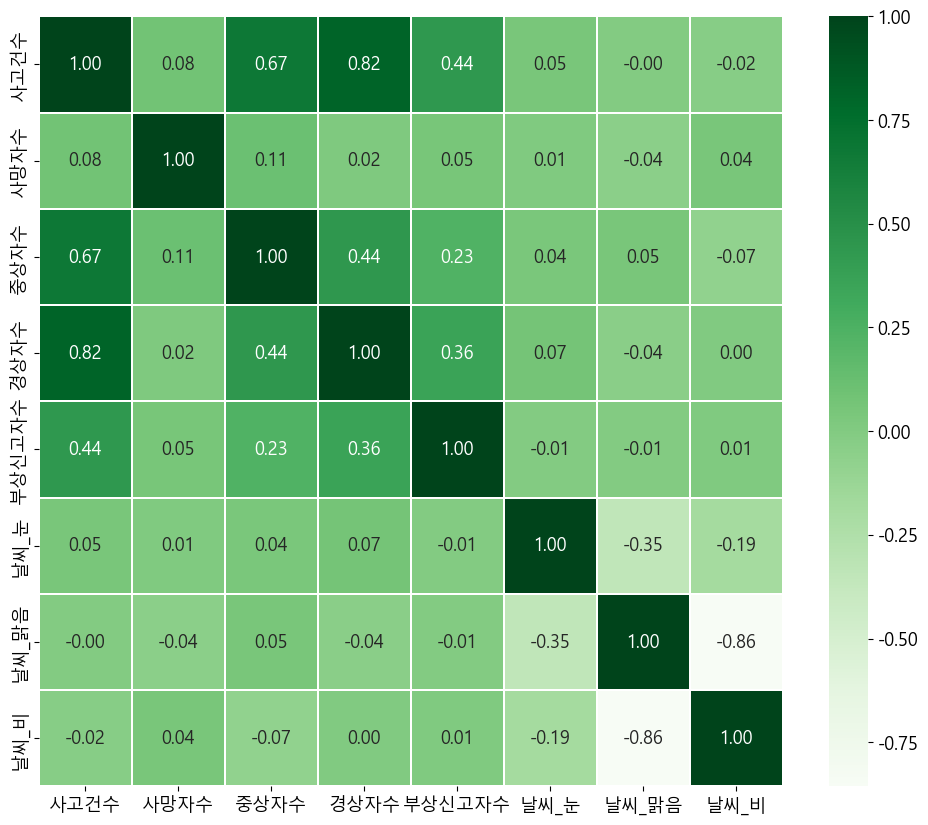

In [106]:
plt.figure(figsize=(12, 10))
sns.heatmap(df_eda.corr(), annot=True, cmap='Greens', fmt='.2f',linewidths=0.2)
plt.show()